In [11]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,normalize, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,3,900.0,Female,India,True,402865.0,31.0,Medical,UPI,Offline
3,4,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [4]:
df[df['Age'] > 100] = np.nan

In [5]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1.0,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2.0,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5.0,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [6]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Employed'] = df['Employed'].fillna(df['Employed'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['ItemsPurchased(monthly)'] = df['ItemsPurchased(monthly)'].fillna(int(df['ItemsPurchased(monthly)'].mean()))
df['ProductType'] = df['ProductType'].fillna(df['ProductType'].mode()[0])
df['PaymentType'] = df['PaymentType'].fillna(df['PaymentType'].mode()[0])
df['Mode'] = df['Mode'].fillna(df['Mode'].mode()[0])

In [7]:
df[['Gender', 'Country', 'Employed', 'ProductType', 'PaymentType', 'Mode']] = df[['Gender', 'Country', 'Employed', 'ProductType', 'PaymentType', 'Mode']].apply(LabelEncoder().fit_transform)

In [8]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1.0,37.0,1,4,1,239796.840909,99.0,1,1,0
1,2.0,44.0,1,1,0,463034.000000,21.0,1,0,1
2,NaN,50.0,1,2,0,239796.840909,50.0,1,2,1
3,4.0,46.0,1,4,1,239796.840909,21.0,1,2,0
4,5.0,19.0,0,2,1,221868.000000,45.0,4,0,1


In [9]:
X = df[['Age','Gender','Income','ItemsPurchased(monthly)']]
Y = df['Mode']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
scaled_normalized_df = pd.DataFrame(X_normalized)

In [14]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(scaled_normalized_df)
x_principal_df = pd.DataFrame(X_principal)
x_principal_df.columns = ['P1','P2']

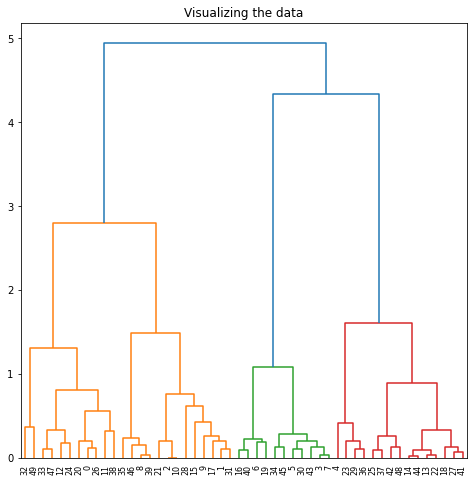

In [15]:
#Hierarchial clustering
plt.figure(figsize=(8,8))
plt.title('Visualizing the data')
Dendrogram = shc.dendrogram((shc.linkage(x_principal_df,method='ward')))

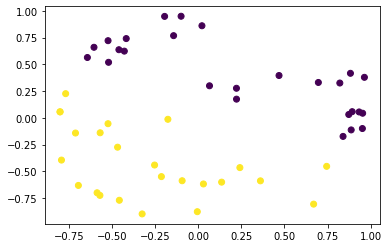

In [18]:
#Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
plt.figure()
plt.scatter(x_principal_df['P1'],x_principal_df['P2'],c=agg.fit_predict(x_principal_df))
plt.show()

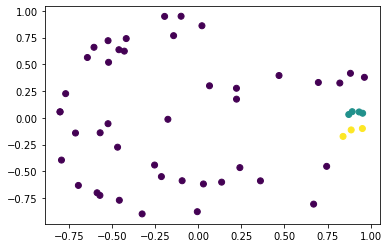

In [21]:
#DBSCAN
dbscan = DBSCAN(eps=0.1,min_samples=3)
plt.scatter(x_principal_df['P1'],x_principal_df['P2'],c=dbscan.fit_predict(x_principal_df))
plt.show()